In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rc('axes', lw = 1.5)
plt.rc('xtick', labelsize = 14)
plt.rc('ytick', labelsize = 14)
plt.rc('xtick.major', size = 5, width = 3)
plt.rc('ytick.major', size = 5, width = 3)

In [4]:
train = pd.read_csv('data/regularized/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
train = train.select_dtypes(include=numerics)
train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


## Single Variable Models

In [7]:
train = train[['GarageArea', 'SalePrice']]
train.head()

,GarageArea,SalePrice
0,548,208500
1,460,181500
2,608,223500
3,642,140000
4,836,250000


检查数据中是否存在缺失值

In [8]:
train.isnull().values.any()

False

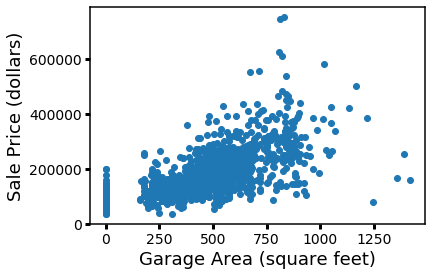

In [9]:
plt.plot('GarageArea','SalePrice',data=train, marker = 'o', linestyle = '')
plt.ylabel('Sale Price (dollars)', fontsize = 18)
plt.xlabel('Garage Area (square feet)', fontsize = 18)
plt.show()

In [10]:
x_train = train['GarageArea'].values.reshape(-1, 1)

y_train = train['SalePrice'].values.reshape(-1, 1)
x_train

array([[548],
       [460],
       [608],
       ...,
       [252],
       [240],
       [276]], dtype=int64)

In [12]:
poly = PolynomialFeatures(degree=10, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_train_poly

array([[5.48000000e+02, 3.00304000e+05, 1.64566592e+08, ...,
        8.13288194e+21, 4.45681930e+24, 2.44233698e+27],
       [4.60000000e+02, 2.11600000e+05, 9.73360000e+07, ...,
        2.00476122e+21, 9.22190163e+23, 4.24207475e+26],
       [6.08000000e+02, 3.69664000e+05, 2.24755712e+08, ...,
        1.86736250e+22, 1.13535640e+25, 6.90296693e+27],
       ...,
       [2.52000000e+02, 6.35040000e+04, 1.60030080e+07, ...,
        1.62631372e+19, 4.09831058e+21, 1.03277427e+24],
       [2.40000000e+02, 5.76000000e+04, 1.38240000e+07, ...,
        1.10075314e+19, 2.64180754e+21, 6.34033810e+23],
       [2.76000000e+02, 7.61760000e+04, 2.10245760e+07, ...,
        3.36722903e+19, 9.29355211e+21, 2.56502038e+24]])

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
x_train_poly_stan = scaler.fit_transform(x_train_poly)
scaler.scale_, scaler.mean_

(array([2.13731608e+02, 2.24211273e+05, 2.32893337e+08, 2.57524995e+11,
        3.06990248e+14, 3.88489528e+17, 5.11049967e+20, 6.87865895e+23,
        9.38340778e+26, 1.29044368e+30]),
 array([4.72980137e+02, 2.69391410e+05, 1.72384828e+08, 1.22842427e+11,
        9.68455771e+13, 8.39558350e+16, 7.94695046e+19, 8.14093850e+22,
        8.92902055e+25, 1.03622078e+29]))

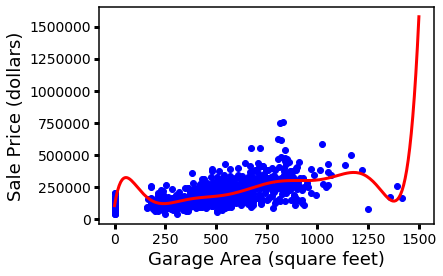

In [15]:
regession = LinearRegression()
regession.fit(x_train_poly_stan, y_train)

x_fit = np.linspace(0, 1500, num=200).reshape(-1, 1)
x_fit_poly = poly.transform(x_fit)
x_fit_poly_stan = scaler.transform(x_fit_poly)
y_fit = regession.predict(x_fit_poly_stan)

plt.plot(x_fit, y_fit, lw=3, color='r', zorder=2)
plt.plot('GarageArea', 'SalePrice', data=train, marker = 'o', color = 'b', linestyle = '', zorder = 1)
plt.ylabel('Sale Price (dollars)', fontsize = 18)
plt.xlabel('Garage Area (square feet)', fontsize = 18)
plt.show()

### Ridge Regression
岭回归就是在线性回归的基础上加上$l_2$-norm约束，
$$J(\theta)=MSE(\theta)+\frac{\alpha}{2}(\theta_1^2+\theta_2^2+\cdots+\theta_n^2)$$
有了正则项以后解就有了很好的性质，首先是对$\theta$的模做约束，使得它的数值会比较小，很大程度上减轻了overfitting的问题；其次是上面求逆部分肯定可以解，在实际使用中ridge regression的作用很大，通过调节参数$\alpha$，可以得到不同的回归模型。

岭回归对输入特征很敏感，一般建议在Ridge回归之前进行标准化。

In [16]:
from sklearn.linear_model import Ridge

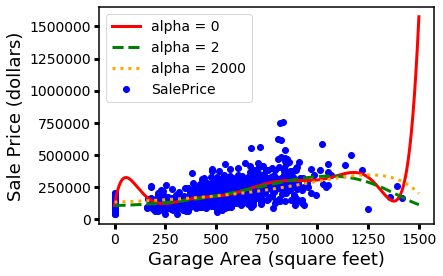

In [17]:
i=0
ls = ['-','--',':']
color = ['r','g','orange']

for a in [0,2,2000]:
    ridge_reg = Ridge(alpha=a)
    ridge_reg.fit(x_train_poly_stan, y_train)

    # predict
    x_fit = np.linspace(0,1500,num=200).reshape(-1,1)
    x_fit_poly = poly.transform(x_fit)
    x_fit_poly_stan = scaler.transform(x_fit_poly)
    y_fit = ridge_reg.predict(x_fit_poly_stan)
    
    # plot
    plt.plot(x_fit,y_fit, lw=3, color=color[i], zorder = 2, label= "alpha = " + str(a),linestyle=ls[i])
    i = i + 1
    
plt.plot('GarageArea','SalePrice',data=train, marker = 'o', color = 'b', linestyle = '', zorder = 1)
plt.ylabel('Sale Price (dollars)', fontsize = 18)
plt.xlabel('Garage Area (square feet)', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

通常，较大的$\alpha$表示拟合度为“较平坦”。 最终，随着$\alpha$接近无穷大，预测$\bar{y}$将只是一个常数，因为所有$\theta$（截距除外）都将被正规化为零。 从理论上讲，$\alpha = 0$的岭回归应具有与常规线性回归相同的结果，但有时并非如此。 在此处查看一篇文章：[https://stackoverflow.com/questions/40570370/difference-between-linearregression-and-ridgealpha-0](https://stackoverflow.com/questions/40570370/difference-between-linearregression-and-ridgealpha-0)。 该帖子描述了多项式模型，其中岭回归溢出，但线性回归没有。

### Lasso Regression
Lasso回归的成本函数为
$$J(\theta)=MSE(\theta) + \alpha(|\theta_1|+|\theta_2|+\cdots+|\theta_n|)$$
其中惩罚项与$l_1$范数成正比，Lasso回归比岭回归的优势在于对于很小的$\theta$也做了惩罚，而Ridge的$l_2$过分惩罚了大的$\theta$，对小的$\theta$几乎没有惩罚（因为是损失值的平方）。

In [18]:
from sklearn.linear_model import Lasso

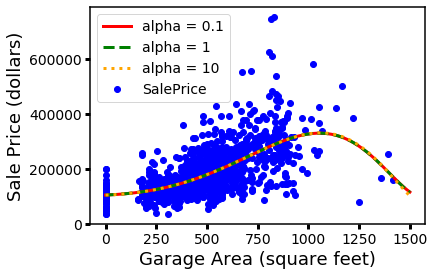

In [21]:
i=0
ls = ['-','--',':']
color = ['r','g','orange']

for a in [0.1,1,10]:
    lasso_reg = Lasso(alpha=a)
    lasso_reg.fit(x_train_poly_stan, y_train)

    # predict
    x_fit = np.linspace(0,1500,num=200).reshape(-1,1)
    x_fit_poly = poly.transform(x_fit)
    x_fit_poly_stan = scaler.transform(x_fit_poly)
    y_fit = lasso_reg.predict(x_fit_poly_stan)
    
    # plot
    plt.plot(x_fit,y_fit, lw=3, color=color[i], zorder = 2, label= "alpha = " + str(a),linestyle=ls[i])
    i = i + 1
    
plt.plot('GarageArea','SalePrice',data=train, marker = 'o', color = 'b', linestyle = '', zorder = 1)
plt.ylabel('Sale Price (dollars)', fontsize = 18)
plt.xlabel('Garage Area (square feet)', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

经过测试的三个$\alpha$拟合非常相似。 如前所述，Lasso回归倾向于返回稀疏$\theta$向量，其中消除了许多最不重要的特征（设置为0）。 即使当$\alpha$很小时，也会发生这种消除，从而导致对一定范围的$\alpha$的相似拟合。 

In [22]:
from sklearn.linear_model import SGDRegressor

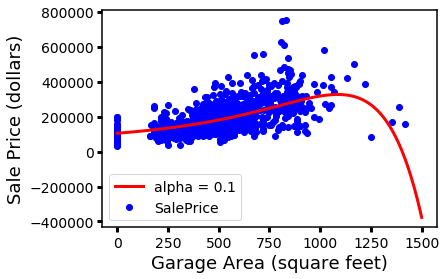

In [24]:
sgd = SGDRegressor(loss='squared_loss', penalty='l2', alpha=0.1)
y_train = y_train.ravel() # format required by sgd
sgd.fit(x_train_poly_stan, y_train)

# predict
x_fit = np.linspace(0,1500,num=200).reshape(-1,1)
x_fit_poly = poly.transform(x_fit)
x_fit_foly_stan = scaler.transform(x_fit_poly)
y_fit = sgd.predict(x_fit_poly_stan)

plt.plot(x_fit,y_fit, lw=3, color='r', zorder = 2, label= "alpha = 0.1",linestyle='-')
plt.plot('GarageArea','SalePrice',data=train, marker = 'o', color = 'b', linestyle = '', zorder = 1)
plt.ylabel('Sale Price (dollars)', fontsize = 18)
plt.xlabel('Garage Area (square feet)', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

### Elastic Net
$$J(\theta)=MSE(\theta) + r lasso\_penalty + (1-r) rideg\_penalty$$
ElasticNet 是一种使用L1和L2先验作为正则化矩阵的线性回归模型.这种组合用于只有很少的权重非零的稀疏模型，比如:class:Lasso, 但是又能保持:class:Ridge 的正则化属性.我们可以使用 l1_ratio 参数来调节L1和L2的凸组合(一类特殊的线性组合).

当多个特征和另一个特征相关的时候弹性网络非常有用。Lasso 倾向于随机选择其中一个，而弹性网络更倾向于选择两个.
在实践中，Lasso 和 Ridge 之间权衡的一个优势是它允许在循环过程（Under rotate）中继承 Ridge 的稳定性.

In [25]:
from sklearn.linear_model import ElasticNet

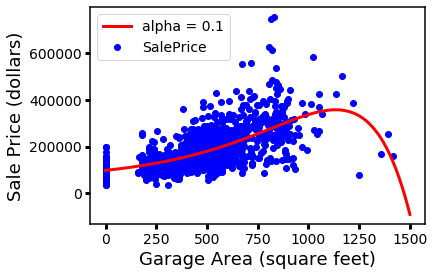

In [26]:
y_train = y_train.reshape(-1,1)
elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5)
elastic_reg.fit(x_train_poly_stan, y_train)

# predict
x_fit = np.linspace(0,1500,num=200).reshape(-1,1)
x_fit_poly = poly.transform(x_fit)
x_fit_poly_stan = scaler.transform(x_fit_poly)
y_fit = elastic_reg.predict(x_fit_poly_stan)

plt.plot(x_fit,y_fit, lw=3, color='r', zorder = 2, label= "alpha = 0.1",linestyle='-')
plt.plot('GarageArea','SalePrice',data=train, marker = 'o', color = 'b', linestyle = '', zorder = 1)
plt.ylabel('Sale Price (dollars)', fontsize = 18)
plt.xlabel('Garage Area (square feet)', fontsize = 18)
plt.legend(fontsize = 14)
plt.show()

## Multi-variable models

In [27]:
from sklearn.metrics import mean_squared_error

In [28]:
train = pd.read_csv('data/regularized/train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [29]:
# Obtain training data
x_train = train[['OverallQual','LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'OpenPorchSF']].values
y_train = train['SalePrice'].values.reshape(-1,1)

In [32]:
# Transform the data
poly2 = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly2.fit_transform(x_train)
scaler = StandardScaler()
x_train_poly_stan = scaler.fit_transform(x_train_poly)

# Fit the data
elastic_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.85)
elastic_reg.fit(x_train_poly_stan, y_train)

# evaluate performance on training set
y_train_hat = elastic_reg.predict(x_train_poly_stan)

# calculate rmse based on log(price)
mse = mean_squared_error(np.log(y_train), np.log(y_train_hat))
rmse = np.sqrt(mse)
print(rmse)

0.15231481065200003


In [38]:
x_train.shape

(1460, 7)

In [37]:
x_train_poly.shape

(1460, 329)

In [43]:
y_train_hat.shape

(1460,)

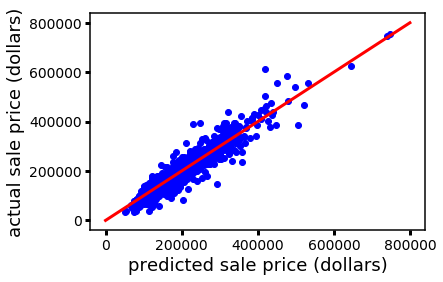

In [44]:
x = np.linspace(0,800000,num=1000)
plt.plot(y_train_hat, y_train, marker='o', linestyle = '', zorder = 1, color='b')
plt.plot(x, x, linestyle = '-',color='red',zorder=2,lw=3)
plt.xlabel('predicted sale price (dollars)', fontsize = 18)
plt.ylabel('actual sale price (dollars)', fontsize = 18)
plt.show()

In [34]:
test = pd.read_csv('data/regularized/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [35]:
test = test[['Id','OverallQual','LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea','OpenPorchSF']]
test.isnull().any()

Id             False
OverallQual    False
LotArea        False
TotalBsmtSF     True
1stFlrSF       False
2ndFlrSF       False
GarageArea      True
OpenPorchSF    False
dtype: bool

In [45]:
# 使用均值填充
dict_ms = {'TotalBsmtSF':test['TotalBsmtSF'].mean(skipna=True),
          'GarageArea':test['GarageArea'].mean(skipna=True)}
test = test.fillna(value=dict_ms)
test.isnull().any()

Id             False
OverallQual    False
LotArea        False
TotalBsmtSF    False
1stFlrSF       False
2ndFlrSF       False
GarageArea     False
OpenPorchSF    False
dtype: bool

In [46]:
x_test = test[['OverallQual','LotArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GarageArea', 'OpenPorchSF']].values
x_test_poly = poly2.transform(x_test)
x_test_poly_stan = scaler.transform(x_test_poly)
y_test_hat = elastic_reg.predict(x_test_poly_stan)

In [48]:
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = y_test_hat
sub.to_csv('submission.csv', index=False)

**RMSE(Root Mean Squared Error)**
$$\sqrt{\frac{1}{m}\sum_{i=1}^m(y_{test}^{(i)} - \hat{y}_{test}^{(i)})^2}$$

### SGD和早停止
- 训练集分为训练集和验证集，测试集用来检测验证集的效果。

In [49]:
poly2 = PolynomialFeatures(degree = 4, include_bias = False)
x_train_poly = poly2.fit_transform(x_train)
scaler = StandardScaler()
x_train_ploy_stan = scaler.fit_transform(x_train_poly)
y_train_log = np.log(y_train)

In [50]:
y_train_log

array([[12.24769432],
       [12.10901093],
       [12.31716669],
       ...,
       [12.49312952],
       [11.86446223],
       [11.90158345]])

In [51]:
from sklearn.utils import shuffle
x_shuffled, y_shuffled = shuffle(x_train_poly_stan, y_train_log)

train_ratio = 0.8
m_train = np.int(len(x_shuffled[:,0]) * train_ratio)
print('Train sample size is:', m_train)

x_train_stan = x_shuffled[0:m_train]
y_train = y_shuffled[0:m_train].ravel()
x_val_stan = x_shuffled[m_train:]
y_val = y_shuffled[m_train:].ravel()

Train sample size is: 1168


In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
from copy import deepcopy

**SGDRegressor**
- learning_rate:
    - constant
    $$eta=eta_0$$
    - optimal
    $$eta=\frac{1.0}{alpha \times (t+t_0)}$$
    - invscaling
    $$eta=\frac{eta_0}{pow(t, power\_t)}$$

In [56]:
sgd_reg = SGDRegressor(warm_start=True, penalty=None, learning_rate='constant', eta0=0.00001)

mse_val_min = float('inf')
best_epoch = None
best_model = None
rmse_train = []
rmse_val = []

n_no_change = 0

for epoch in range(1, 100000):
    # 训练集
    sgd_reg.fit(x_train_stan, y_train)
    y_train_predict = sgd_reg.predict(x_train_stan)
    train_error = mean_squared_error(y_train_predict, y_train)
    rmse_train.append(np.sqrt(train_error))
    # 验证集
    y_val_predict = sgd_reg.predict(x_val_stan)
    val_error = mean_squared_error(y_val_predict, y_val)
    rmse_val.append(np.sqrt(val_error))
    # 早停止的具体操作就是 RMSE不再变化
    if val_error < mse_val_min:
        n_no_change = 0
        mse_val_min = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)
    else:
        n_no_change += 1
    
    if n_no_change >= 1000:
        print('Time to stop!!!')
        print('Num Epoch = ', epoch)
        print('Best Epoch = ', best_epoch)
        break

Time to stop!!!
Num Epoch =  2681
Best Epoch =  1681


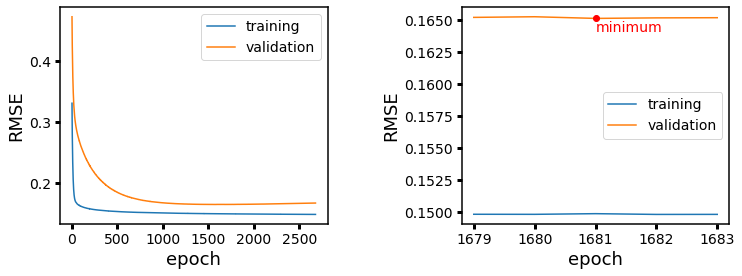

In [57]:
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(12,4))
plt.subplots_adjust(wspace=0.5)

# 绘制验证集和训练集的rmse变化
ax[0].plot(rmse_train, label='training')
ax[0].plot(rmse_val, label='validation')
ax[0].set_xlabel('epoch', fontsize=18)
ax[0].set_ylabel('RMSE', fontsize=18)
ax[0].legend(fontsize=14)

# 绘制最优值前后的RMSE
ax[1].plot(rmse_train[best_epoch-3:best_epoch+2], label = 'training')
ax[1].plot(rmse_val[best_epoch-3:best_epoch+2], label = 'validation')
ax[1].set_xlabel('epoch', fontsize = 18)
ax[1].set_ylabel('RMSE', fontsize = 18)
ax[1].set_xticks([0,1,2,3,4])
xticklabels = [str(e) for e in range(best_epoch-2,best_epoch+3)]
ax[1].set_xticklabels(xticklabels)
ax[1].plot(2,rmse_val[best_epoch-1],marker='o',color='r')
ax[1].text(2,rmse_val[best_epoch-1]-0.001,'minimum',color='r',fontsize=14)
ax[1].legend(fontsize=14)
plt.show()

In [59]:
y_train_hat_log = best_model.predict(x_train_poly_stan)
print(np.sqrt(mean_squared_error(y_train_hat_log,y_train_log)))

0.15307490411626065


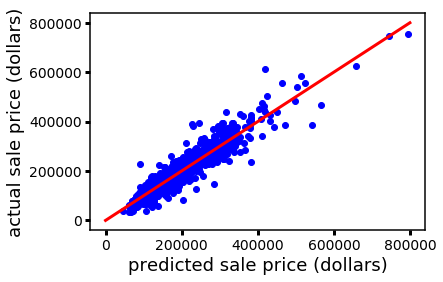

In [60]:
# plot the train + validation sets' predicted sale price vs actual sale price
plt.plot(np.exp(y_train_hat_log),np.exp(y_train_log), marker = 'o', linestyle='', color = 'b')
x = np.linspace(0,800000,num=1000)
plt.plot(x, x, linestyle = '-',color='red',zorder=2,lw=3)
plt.xlabel('predicted sale price (dollars)', fontsize = 18)
plt.ylabel('actual sale price (dollars)', fontsize = 18)
plt.show()

### K-Fold

In [61]:
from sklearn.model_selection import KFold

In [71]:
x_shuffle, y_shuffle = shuffle(x_train_poly_stan, y_train_log)

sgd_reg = SGDRegressor(warm_start=True, penalty=None, learning_rate='constant', eta0=0.00001)

round_num = 0
best_epoch = None
best_model = None
rmse_train = []
rmse_val = []

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(x_shuffled):
    round_num = round_num + 1
    print("Round #", round_num)
    x_train_stan, x_val_stan = x_shuffled[train_index], x_shuffled[val_index]
    y_train, y_val = y_shuffled[train_index].ravel(), y_shuffled[val_index].ravel()
    
    print("Running...")
    mse_val_min = float("inf")
    n_no_change = 0

    for epoch in range(1,100000):
        sgd_reg.fit(x_train_stan, y_train)
        # 训练集
        y_train_predict = sgd_reg.predict(x_train_stan)
        train_error = mean_squared_error(y_train_predict, y_train)
        rmse_train.append(np.sqrt(train_error))
        # 验证集
        y_val_predict = sgd_reg.predict(x_val_stan)
        val_error = mean_squared_error(y_val_predict, y_val)
        rmse_val.append(np.sqrt(val_error))
        
        if val_error < mse_val_min:
            n_no_change = 0
            mse_val_min = val_error
            best_epoch = epoch
            best_model = deepcopy(sgd_reg)
        else:
            n_no_change = n_no_change + 1
    
        if n_no_change >= 1000:
            print('Time to stop!')
            print('num epoch =', epoch)
            print('best epoch = ', best_epoch,', from round #', round_num)
            break

Round # 1
Running...
Time to stop!
num epoch = 80417
best epoch =  79417 , from round # 1
Round # 2
Running...
Time to stop!
num epoch = 1987
best epoch =  987 , from round # 2
Round # 3
Running...
Time to stop!
num epoch = 1008
best epoch =  8 , from round # 3
Round # 4
Running...
Time to stop!
num epoch = 1001
best epoch =  1 , from round # 4
Round # 5
Running...
Time to stop!
num epoch = 1001
best epoch =  1 , from round # 5


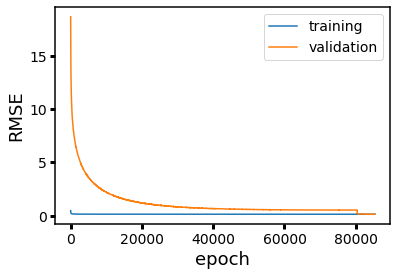

In [72]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
plt.subplots_adjust(wspace=0.5)

ax.plot(rmse_train, label = 'training')
ax.plot(rmse_val, label = 'validation')
ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('RMSE', fontsize = 18)
ax.legend(fontsize=14)
plt.show()

In [73]:
y_test_hat_log = best_model.predict(x_test_poly_stan)
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = np.exp(y_test_hat_log)
sub.to_csv('submission2.csv', index=False)

In [74]:
x_shuffle, y_shuffle = shuffle(x_train_poly_stan, y_train_log)



round_num = 0
best_epoch = None
best_model = None
rmse_train = []
rmse_val = []

kf = KFold(n_splits=5)

for train_index, val_index in kf.split(x_shuffled):
    round_num = round_num + 1
    print("Round #", round_num)
    x_train_stan, x_val_stan = x_shuffled[train_index], x_shuffled[val_index]
    y_train, y_val = y_shuffled[train_index].ravel(), y_shuffled[val_index].ravel()
    
    print("Running...")
    mse_val_min = float("inf")
    n_no_change = 0
    sgd_reg = SGDRegressor(warm_start=True, penalty=None, learning_rate='constant', eta0=0.00001)
    for epoch in range(1,100000):
        
        sgd_reg.fit(x_train_stan, y_train)
        # 训练集
        y_train_predict = sgd_reg.predict(x_train_stan)
        train_error = mean_squared_error(y_train_predict, y_train)
        rmse_train.append(np.sqrt(train_error))
        # 验证集
        y_val_predict = sgd_reg.predict(x_val_stan)
        val_error = mean_squared_error(y_val_predict, y_val)
        rmse_val.append(np.sqrt(val_error))
        
        if val_error < mse_val_min:
            n_no_change = 0
            mse_val_min = val_error
            best_epoch = epoch
            best_model = deepcopy(sgd_reg)
        else:
            n_no_change = n_no_change + 1
    
        if n_no_change >= 1000:
            print('Time to stop!')
            print('num epoch =', epoch)
            print('best epoch = ', best_epoch,', from round #', round_num)
            break

Round # 1
Running...
Time to stop!
num epoch = 75687
best epoch =  74687 , from round # 1
Round # 2
Running...
Time to stop!
num epoch = 5870
best epoch =  4870 , from round # 2
Round # 3
Running...
Time to stop!
num epoch = 1202
best epoch =  202 , from round # 3
Round # 4
Running...
Time to stop!
num epoch = 76593
best epoch =  75593 , from round # 4
Round # 5
Running...
Time to stop!
num epoch = 2623
best epoch =  1623 , from round # 5


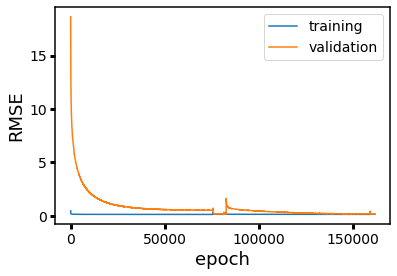

In [75]:
fig,ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6,4))
plt.subplots_adjust(wspace=0.5)

ax.plot(rmse_train, label = 'training')
ax.plot(rmse_val, label = 'validation')
ax.set_xlabel('epoch', fontsize = 18)
ax.set_ylabel('RMSE', fontsize = 18)
ax.legend(fontsize=14)
plt.show()

**问题**
- 第一折和之后的折数，模型基于第一折，后续折数的数据是基于第一折还是模型重新训练。

In [76]:
y_train_hat_log = best_model.predict(x_train_poly_stan)
print(np.sqrt(mean_squared_error(y_train_hat_log, y_train_log)))

0.15309255852859263


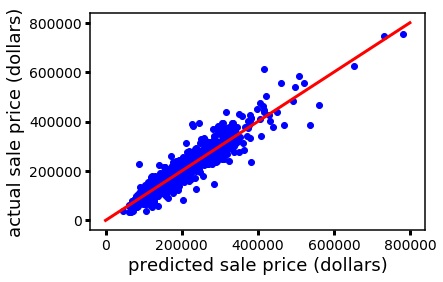

In [77]:
# plot the train + validation sets' predicted sale price vs actual sale price
plt.plot(np.exp(y_train_hat_log),np.exp(y_train_log), marker = 'o', linestyle='', color = 'b')
x = np.linspace(0,800000,num=1000)
plt.plot(x, x, linestyle = '-',color='red',zorder=2,lw=3)
plt.xlabel('predicted sale price (dollars)', fontsize = 18)
plt.ylabel('actual sale price (dollars)', fontsize = 18)
plt.show()

In [79]:
# test set (data preprocessing - see Elastic Net part)
y_test_hat_log = best_model.predict(x_test_poly_stan)
sub = pd.DataFrame()
sub['Id'] = test['Id']
sub['SalePrice'] = np.exp(y_test_hat_log)
sub.to_csv('submission3.csv',index=False)

## Reference
[1. 机器学习方法：回归（二）：稀疏与正则约束ridge regression，Lasso](https://blog.csdn.net/xbinworld/article/details/44276389)

[2. 弹性网络（ Elastic Net）](https://blog.csdn.net/qq_21904665/article/details/52315642)

[3. SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)

[4. kaggle House Price](https://www.kaggle.com/fengdanye/machine-learning-2-regularized-lm-early-stopping/output#Multi-variable-models-(for-actual-prediction))